In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# data preparation
### importing the data
### understandin the data
### checking for the null values in our data

In [2]:
data = pd.read_csv('C:/Users/aravi/Downloads/ml dataset/Default_Fin.csv')


In [3]:
data.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [5]:
data.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [6]:
#### data is not having a null value


In [7]:
for i in data.columns:
    print(data[i].value_counts())

2047    1
5424    1
1338    1
7481    1
5432    1
       ..
2716    1
8857    1
4759    1
6806    1
2049    1
Name: Index, Length: 10000, dtype: int64
1    7056
0    2944
Name: Employed, dtype: int64
0.00        499
9278.04       3
7579.20       3
6273.24       3
12382.44      3
           ... 
6048.36       1
2717.04       1
1809.24       1
5193.48       1
4061.76       1
Name: Bank Balance, Length: 9227, dtype: int64
361381.80    2
142868.16    2
230266.92    2
486292.08    2
455233.08    2
            ..
287478.24    1
377658.60    1
364952.40    1
549682.80    1
369869.40    1
Name: Annual Salary, Length: 9989, dtype: int64
0    9667
1     333
Name: Defaulted?, dtype: int64


In [8]:
data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [9]:
data.drop(['Index'], axis = 1)

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


In [10]:


# checking for correlation

<AxesSubplot:>

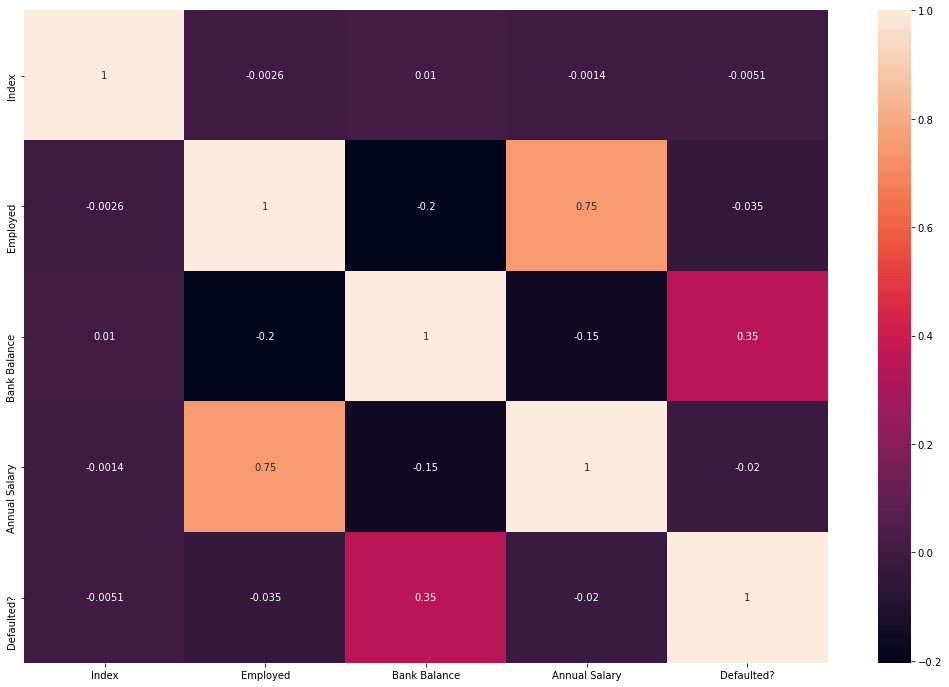

In [11]:
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(), annot = True)

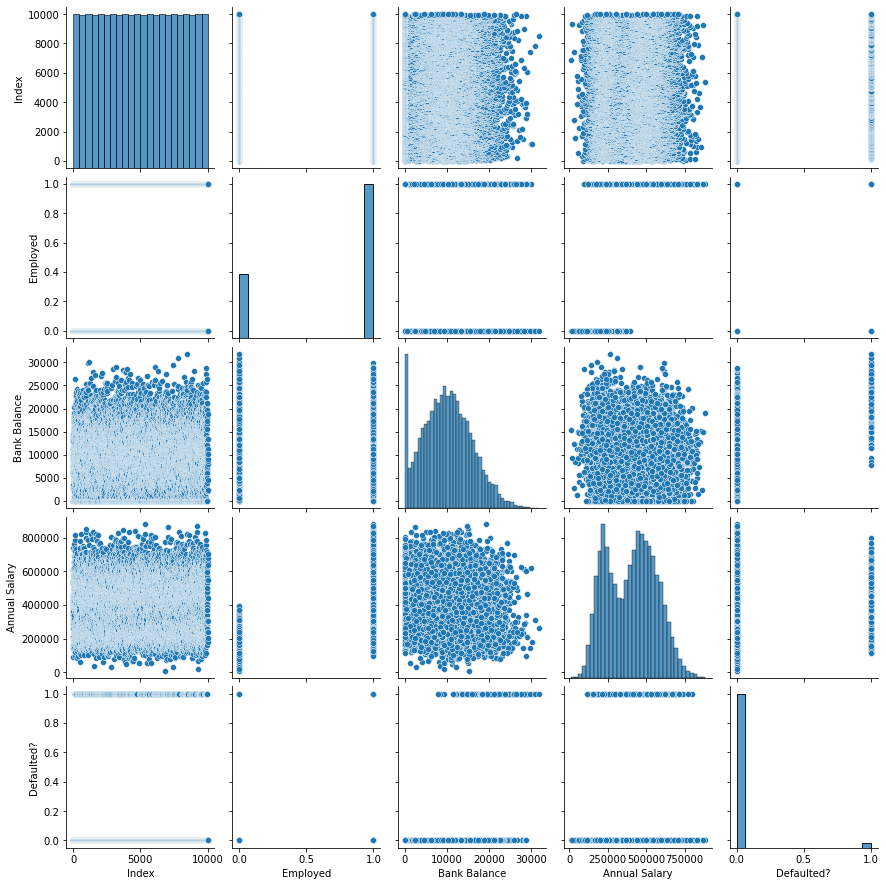

In [12]:
sns.pairplot(data)

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Bank Balance', ylabel='Density'>

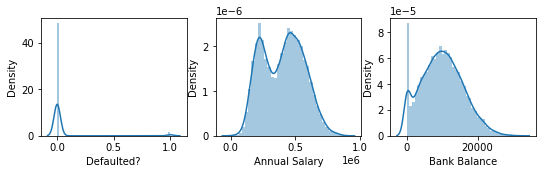

In [13]:
plt.figure(figsize = (12,10))
plt.subplot(4,4,1)
sns.distplot(data['Defaulted?'])
plt.subplot(4,4,2)
sns.distplot(data['Annual Salary'])
plt.subplot(4,4,3)
sns.distplot(data['Bank Balance'])

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Defaulted?', ylabel='count'>

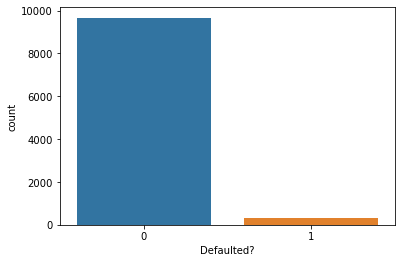

In [14]:
sns.countplot(data['Defaulted?'])

In [15]:
#imbalance data set

In [16]:
#we have two methods to solve this under and over sampling

In [17]:
from imblearn.over_sampling import RandomOverSampler

In [18]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.


from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler(ratio=0.5)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, sampling_strategy=1)

from imblearn.combine import SMOTETomek

from imblearn.under_sampling import NearMiss

smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(x,y)


In [19]:

pip install scikit-learn==0.23.1
pip install imbalanced-learn==0.7.0

SyntaxError: invalid syntax (<ipython-input-19-afd19d7806da>, line 1)

In [ ]:
pip install scikit-learn

In [ ]:
pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
x_smote, y_smote = smote.fit_resample(x,y)

In [22]:
X = data.drop(['Defaulted?'],axis = 1)
y = data['Defaulted?']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dc = DecisionTreeClassifier()

In [27]:
dc_fit = dc.fit(X_train,y_train)

In [29]:
dc_pred = dc_fit.predict(X_test)

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,dc_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3190
           1       0.29      0.32      0.31       110

    accuracy                           0.95      3300
   macro avg       0.64      0.65      0.64      3300
weighted avg       0.95      0.95      0.95      3300



In [32]:
a = data
b = data['Defaulted?']

In [33]:
a.drop(['Defaulted?'],axis = 1)

,Index,Employed,Bank Balance,Annual Salary
0,1,1,8754.36,532339.56
1,2,0,9806.16,145273.56
2,3,1,12882.60,381205.68
3,4,1,6351.00,428453.88
4,5,1,9427.92,461562.00
...,...,...,...,...
9995,9996,1,8538.72,635908.56
9996,9997,1,9095.52,235928.64
9997,9998,1,10144.92,703633.92
9998,9999,1,18828.12,440029.32


In [34]:
from imblearn import under_sampling

In [35]:
from imblearn.over_sampling import RandomOverSampler

In [36]:
rds = RandomOverSampler(random_state = 0)

In [39]:
a_re , b_re = rds.fit_resample(a,b)

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Defaulted?', ylabel='count'>

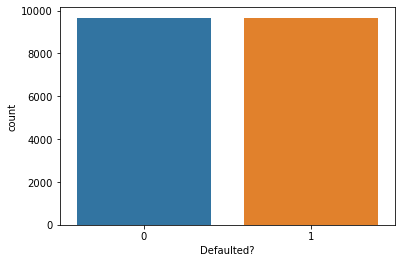

In [40]:
sns.countplot(b_re)

In [ ]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split( a_re, b_re, test_size=0.33, random_state=42)

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
ds = DecisionTreeClassifier()

In [48]:
ds_fit = ds.fit(X_train, y_train)

In [49]:
ds_pred = ds_fit.predict(X_test)

In [50]:
print(classification_report(y_test, ds_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3181
           1       1.00      1.00      1.00      3200

    accuracy                           1.00      6381
   macro avg       1.00      1.00      1.00      6381
weighted avg       1.00      1.00      1.00      6381



In [55]:

from sklearn.metrics import confusion_matrix



In [56]:
print(confusion_matrix(y_test, ds_pred))

[[3181    0]
 [   0 3200]]


In [58]:
print(accuracy_score(y_test, ds_pred))

1.0
